Minority class= 1 : 136
Majority class= 0 : 3536
Proportion: 0.04 : 1


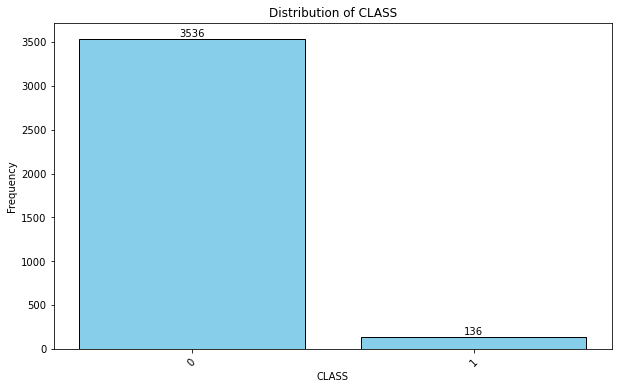

In [16]:
import pandas as pd
from pandas import read_csv, concat, DataFrame, Series
from matplotlib.pyplot import figure, show, gca
from matplotlib.axes import Axes
from matplotlib.container import BarContainer
from matplotlib import rcParams

# Load the dataset
file_path = '/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/class_financial distress.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Define some constants for visual styling
LINE_COLOR = "black"
FILL_COLOR = "skyblue"
FONT_TEXT = rcParams['font.size']

def set_chart_labels(ax: Axes, title: str, xlabel: str, ylabel: str) -> Axes:
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

def set_chart_xticks(xvalues: list, ax: Axes, percentage: bool = False) -> Axes:
    labels = [f"{x:.0%}" if percentage else f"{x}" for x in xvalues]
    ax.set_xticks(range(len(xvalues)))
    ax.set_xticklabels(labels, rotation=45)
    return ax

def plot_bar_chart(
    xvalues: list,
    yvalues: list,
    ax: Axes = None,  # type: ignore
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    percentage: bool = False,
) -> Axes:
    if ax is None:
        ax = gca()
    ax = set_chart_labels(ax=ax, title=title, xlabel=xlabel, ylabel=ylabel)
    ax = set_chart_xticks(xvalues, ax=ax, percentage=percentage)
    values: BarContainer = ax.bar(
        xvalues,
        yvalues,
        edgecolor=LINE_COLOR,
        color=FILL_COLOR
    )
    format_str = "%.2f" if percentage else "%.0f"
    ax.bar_label(values, fmt=format_str)

    return ax

# Analyze the target variable `LAW_CAT_CD`
target = 'CLASS'
class_counts = data[target].value_counts()

# Display class information
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

print("Minority class=", minority_class, ":", class_counts[minority_class])
print("Majority class=", majority_class, ":", class_counts[majority_class])
print(
    "Proportion:",
    round(class_counts[minority_class] / class_counts[majority_class], 2),
    ": 1",
)

# Plotting the bar chart
fig = figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plot_bar_chart(
    xvalues=class_counts.index.tolist(),
    yvalues=class_counts.values.tolist(),
    ax=ax,
    title="Distribution of CLASS",
    xlabel="CLASS",
    ylabel="Frequency"
)

show()


In [17]:
# Split the dataset into two subdatasets: one for each class
df_positives = data[data[target] == minority_class]
df_negatives = data[data[target] == majority_class]

# Display the size of each subset
print(f"Number of rows in the positive class ({minority_class}): {len(df_positives)}")
print(f"Number of rows in the negative class ({majority_class}): {len(df_negatives)}")

# Optionally, save the subsets for further exploration
df_positives.to_csv("positive_class_financial.csv", index=False)
df_negatives.to_csv("negative_class_financial.csv", index=False)

# Sampling example: Adjust the number of rows in the positive class to balance the dataset
# Uncomment below to sample as needed
# sampled_positives = df_positives.sample(n=len(df_negatives), random_state=42)
# balanced_dataset = pd.concat([sampled_positives, df_negatives], axis=0)

# Save the balanced dataset for further exploration
# balanced_dataset.to_csv("balanced_dataset.csv", index=False)


Number of rows in the positive class (1): 136
Number of rows in the negative class (0): 3536


## Undersampling

In [18]:
# Perform undersampling on the majority class
df_neg_sample: DataFrame = DataFrame(df_negatives.sample(len(df_positives), random_state=42))

# Combine the minority class and sampled majority class to create a balanced dataset
df_under: DataFrame = concat([df_positives, df_neg_sample], axis=0)

# Save the undersampled dataset
df_under.to_csv("class_financial_under.csv", index=False)

# Display class proportions in the undersampled dataset
print("Minority class=", df_positives, ":", len(df_positives))
print("Majority class=", df_negatives, ":", len(df_negatives))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")

Minority class=       Company  Time  Financial Distress  CLASS       x1        x2       x3  \
3           1     4            -0.56657      1  1.11310 -0.015229  0.85888   
18          3     1            -1.65990      1  0.87440 -0.034676  0.79350   
71          7    11            -1.26540      1  0.94406 -0.067489  0.93840   
122        11     9            -0.80159      1  0.54940 -0.093647  0.78922   
123        12     1            -0.66786      1  1.19530  0.060823  0.77593   
...       ...   ...                 ...    ...      ...       ...      ...   
3446      384    13            -1.07650      1  1.06030 -0.004541  0.84298   
3475      389     9            -0.78181      1  1.19500 -0.056743  0.72227   
3481      390     9            -0.59477      1  1.58300 -0.098116  0.56415   
3636      415     9            -3.67180      1  1.30850 -0.115920  0.96790   
3657      420     3            -2.54970      1  1.33080  0.005893  0.83101   

            x4        x5        x6  ...      x7

## Oversampling